In [21]:
%matplotlib inline
import gdown
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Завантаження файлу з Google Диска
url = "https://drive.google.com/uc?id=1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U"
output_path = "2017_jun_final.csv"
gdown.download(url, output_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U
To: /home/july/Course_GoIT/Data_Science/Home_Work_2/2017_jun_final.csv
100%|██████████| 3.61M/3.61M [00:01<00:00, 3.56MB/s]


'2017_jun_final.csv'

In [23]:
# 1. Прочитати файл
df = pd.read_csv("2017_jun_final.csv")

In [24]:
# 2. Вивести перші декілька рядків
print(df.head())

   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1           

In [25]:
# 3. Визначити розмір таблиці
print("Shape:", df.shape)

Shape: (8704, 25)


In [26]:
# 4. Визначити типи стовпців
print("Column Types:")
print(df.dtypes)

Column Types:
N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary            

In [27]:
# 5. Порахувати частку пропусків
missing_percent = df.isnull().sum() / len(df) * 100
print("Missing Percent:")
print(missing_percent)

Missing Percent:
N                                    0.000000
Должность                            0.000000
Язык.программирования               44.232537
Специализация                       82.938879
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Университет                          4.113051
Еще.студент                          0.000000
Уровень.английского                  0.000000
Предметная.область                   2.562040
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp  

In [28]:
# 6. Видалити стовпці з пропусками (крім стовпця "Язык.программирования")
columns_to_keep = ["Язык.программирования"]
df_cleaned = df.dropna(subset=columns_to_keep, how="any")

In [29]:
# 7. Порахувати частку пропусків після видалення
missing_percent_cleaned = df_cleaned.isnull().sum() / len(df_cleaned) * 100
print("Missing Percent After Cleaning:")
print(missing_percent_cleaned)

Missing Percent After Cleaning:
N                                    0.000000
Должность                            0.000000
Язык.программирования                0.000000
Специализация                       99.979398
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Университет                          4.758962
Еще.студент                          0.000000
Уровень.английского                  0.000000
Предметная.область                   0.618047
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
cu

In [30]:
# 8. Видалити рядки з пропусками
df_no_missing_rows = df.dropna()

In [31]:
# 9. Визначити розмір після видалення рядків
print("Shape after dropping missing rows:", df_no_missing_rows.shape)

Shape after dropping missing rows: (0, 25)


In [32]:
# 10. Відібрати рядки з Python
python_data = df[df["Язык.программирования"] == "Python"]

In [33]:
# 11. Визначити розмір таблиці python_data
print("Shape of python_data:", python_data.shape)

Shape of python_data: (207, 25)


In [34]:
# 12. Згрупувати за стовпцем "Должность"
grouped = df.groupby("Должность")

In [35]:
# 13. Виконати агрегацію для групованих даних
aggregated = grouped.agg({"Зарплата.в.месяц": ["min", "max"]})

In [36]:
# 14. Створити функцію fill_avg_salary
def fill_avg_salary(row):
    return (row["Зарплата.в.месяц"]["min"] + row["Зарплата.в.месяц"]["max"]) / 2

In [37]:
# Додати новий стовпець "avg"
aggregated["avg"] = aggregated.apply(fill_avg_salary, axis=1)

In [38]:
# 15. Описова статистика для нового стовпця
print(aggregated["avg"].describe())

count       32.000000
mean      3449.234375
std       3093.885174
min        900.000000
25%       1820.500000
50%       2837.500000
75%       3756.250000
max      17750.000000
Name: avg, dtype: float64


In [39]:
# 16. Зберегти таблицю в CSV файл
aggregated.to_csv("aggregated_data.csv", index=False)

In [40]:
# Побудова графіків
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Розподіл зарплат за місяць')

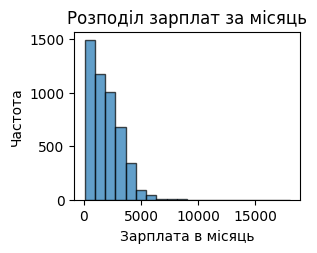

In [41]:
# Графік 1: Розподіл зарплат
plt.subplot(2, 2, 1)
plt.hist(df_cleaned["Зарплата.в.месяц"], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Зарплата в місяць")
plt.ylabel("Частота")
plt.title("Розподіл зарплат за місяць")

Text(0.5, 1.0, 'Залежність зарплати від віку')

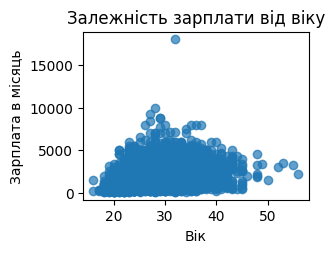

In [42]:
# Графік 2: Залежність між зарплатою та віком
plt.subplot(2, 2, 2)
plt.scatter(df_cleaned["Возраст"], df_cleaned["Зарплата.в.месяц"], alpha=0.7)
plt.xlabel("Вік")
plt.ylabel("Зарплата в місяць")
plt.title("Залежність зарплати від віку")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Software Engineer'),
  Text(1, 0, 'Junior Software Engineer'),
  Text(2, 0, 'Senior Software Engineer'),
  Text(3, 0, 'Technical Lead'),
  Text(4, 0, 'System Architect'),
  Text(5, 0, 'HTML coder'),
  Text(6, 0, 'Team lead'),
  Text(7, 0, 'Data Scientist / Data Analyst'),
  Text(8, 0, 'DevOps'),
  Text(9, 0, 'Product Manager'),
  Text(10, 0, 'ERP / CRM')])

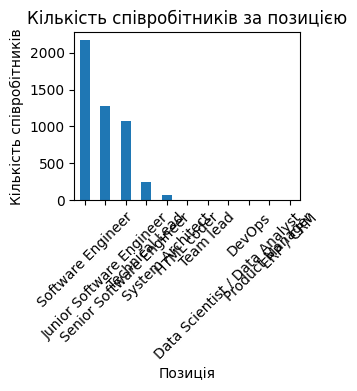

In [43]:
# Графік 3: Розподіл зарплат за позиціями
plt.subplot(2, 2, 3)
aggregated.reset_index(inplace=True)
position_counts = df_cleaned["Должность"].value_counts()
position_counts.plot(kind="bar")
plt.xlabel("Позиція")
plt.ylabel("Кількість співробітників")
plt.title("Кількість співробітників за позицією")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Розподіл середнього значення зарплати за позиціями')

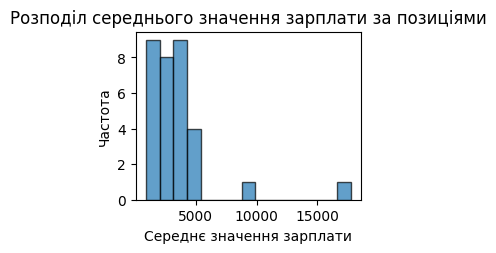

In [44]:
# Графік 4: Графік описової статистики нового стовпця
plt.subplot(2, 2, 4)
plt.hist(aggregated["avg"], bins=15, edgecolor='black', alpha=0.7)
plt.xlabel("Середнє значення зарплати")
plt.ylabel("Частота")
plt.title("Розподіл середнього значення зарплати за позиціями")

In [45]:
# Відображення графіків
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>